<a href="https://colab.research.google.com/github/Ankit7557/MLnow_2.0/blob/main/3.0_LinearRegression/3.1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Ankit Prajapati 

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
cd '/content/drive/MyDrive/ML/eda_02/student'

/content/drive/MyDrive/ML/eda_02/student


In [39]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


In [40]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [41]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [42]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are going to consider the columns `G1` and `G3` for univariate Linear regression



In [43]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [44]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [45]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


## Data visualization

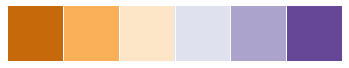

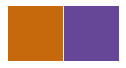

In [46]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [47]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

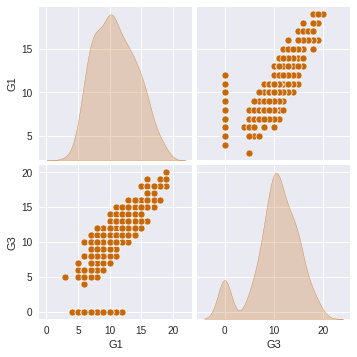

In [48]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [49]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [50]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [51]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [52]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [53]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [54]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [55]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['mae', 'mse']
)

In [56]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 18ms/step - loss: 10.2020 - mae: 10.2020 - mse: 124.3622 - val_loss: 10.6892 - val_mae: 10.6892 - val_mse: 134.3152
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 10.1026 - mae: 10.1026 - mse: 121.7769 - val_loss: 10.5789 - val_mae: 10.5789 - val_mse: 131.4073
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 10.0023 - mae: 10.0023 - mse: 119.2384 - val_loss: 10.4691 - val_mae: 10.4691 - val_mse: 128.5438
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 9.9001 - mae: 9.9001 - mse: 116.6061 - val_loss: 10.3604 - val_mae: 10.3604 - val_mse: 125.7424
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 9.8016 - mae: 9.8016 - mse: 114.1807 - val_loss: 10.2499 - val_mae: 10.2499 - val_mse: 122.9254
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 9.7011 - mae: 9.7011 - mse: 111.6584 - val_loss: 10.1398 - val_mae: 10.1398

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [58]:
tempListforPreds=[1,2,3,4,5]

print(model.predict(tempListforPreds))

[[1.6294861]
 [2.5720334]
 [3.5145807]
 [4.457128 ]
 [5.3996754]]


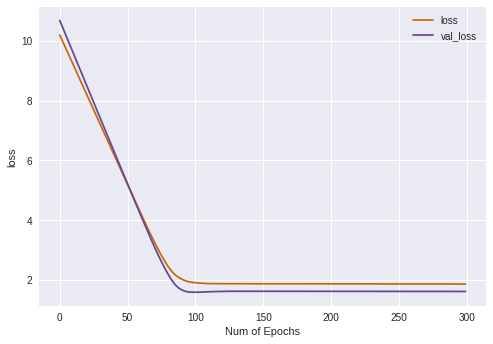

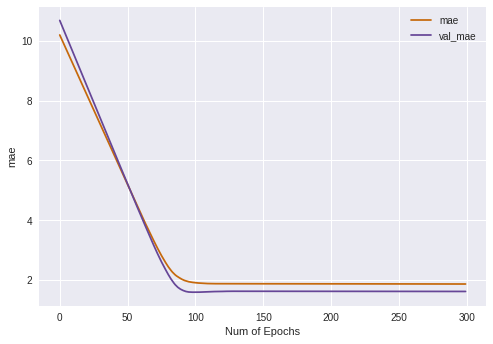

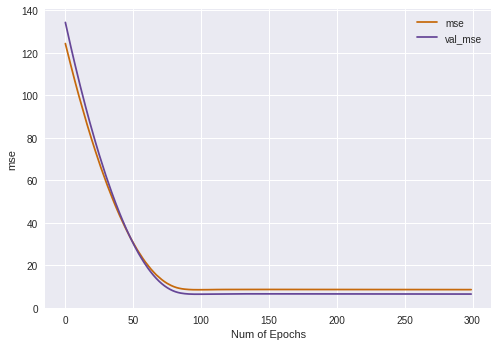

In [59]:
# string --> loss , mae, mse
import matplotlib.pyplot as plt

def plotGraphs(history, string): 
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')
plotGraphs(history, 'mse')

In [60]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values
print(testPreds)

[13.882601   6.3422227 11.054959  16.710243  16.710243  11.997506
 13.882601  18.595339  18.595339   8.227317  13.882601  12.940053
  8.227317   7.28477    9.169864  12.940053  11.054959  15.767695
  7.28477   10.1124115 14.825149  12.940053  13.882601  15.767695
  7.28477    7.28477    8.227317  10.1124115 11.997506  10.1124115
 11.997506  12.940053  10.1124115  6.3422227  9.169864  11.997506
  7.28477    8.227317  13.882601   9.169864   9.169864   7.28477
 11.997506   6.3422227 12.940053   7.28477    7.28477   11.054959
 12.940053  16.710243  11.997506  14.825149   9.169864  11.997506
 14.825149  11.997506  14.825149  11.997506  14.825149  11.054959
 11.997506   8.227317  15.767695   7.28477   15.767695  11.054959
 15.767695  12.940053   8.227317   8.227317  11.997506  17.65279
 12.940053  15.767695  10.1124115  7.28477   10.1124115  7.28477
 11.054959 ]


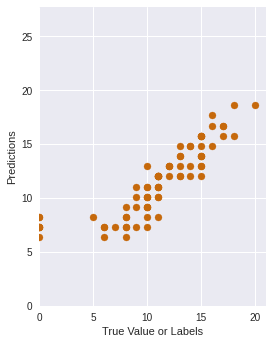

In [65]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])

  plt.show()

predPlot(testLabels, testPreds)

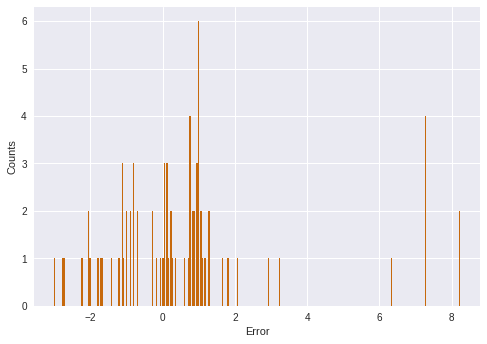

In [66]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)